In [1]:
import pandas as pd 
df = pd.read_csv('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/data/COMED_hourly_preprocessed.csv')

In [2]:
df

,Datetime,COMED_MW_scaled,Season_encoded,Time_of_day_encoded,Holiday_encoded
0,2011-01-01 01:00:00,-0.557143,3,3,1
1,2011-01-01 02:00:00,-0.688278,3,3,1
2,2011-01-01 03:00:00,-0.784249,3,3,1
3,2011-01-01 04:00:00,-0.883150,3,3,1
4,2011-01-01 05:00:00,-0.900366,3,3,1
...,...,...,...,...,...
66492,2018-08-02 20:00:00,1.935897,2,1,1
66493,2018-08-02 21:00:00,1.625641,2,1,1
66494,2018-08-02 22:00:00,1.441026,2,3,1
66495,2018-08-02 23:00:00,1.207326,2,3,1


In [3]:
# Divide the DataFrame into training and testing data
train = df.iloc[:int(0.8 * len(df))]
test = df.iloc[int(0.8 * len(df)):]

In [4]:
exog_data = train[['Season_encoded', 'Time_of_day_encoded','Holiday_encoded']]  # DataFrame of exogenous regressors
target_data = train['COMED_MW_scaled']

In [5]:
# Train a SARIMA model 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=target_data, exog=exog_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)) 
model_fit = model.fit(disp=False)

/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
#make predictions on the test data
exog_data_test = test[['Season_encoded', 'Time_of_day_encoded','Holiday_encoded']]
predictions = model_fit.forecast(steps=len(test), exog=exog_data_test)
predictions

53197    0.505027
53198    0.403005
53199    0.277404
53200    0.100011
53201   -0.142371
           ...   
66492    1.187663
66493    1.137743
66494    1.063609
66495    0.961346
66496    0.799575
Name: predicted_mean, Length: 13300, dtype: float64

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate the error metrics
mae = mean_absolute_error(test['COMED_MW_scaled'], predictions)
mse = mean_squared_error(test['COMED_MW_scaled'], predictions)
r2 = r2_score(test['COMED_MW_scaled'], predictions)

In [11]:
print("MAE", mae)
print("MSE", mse)
print("R2", r2)

MAE 0.6096055129067429
MSE 0.554551833767828
R2 0.1399309888049043


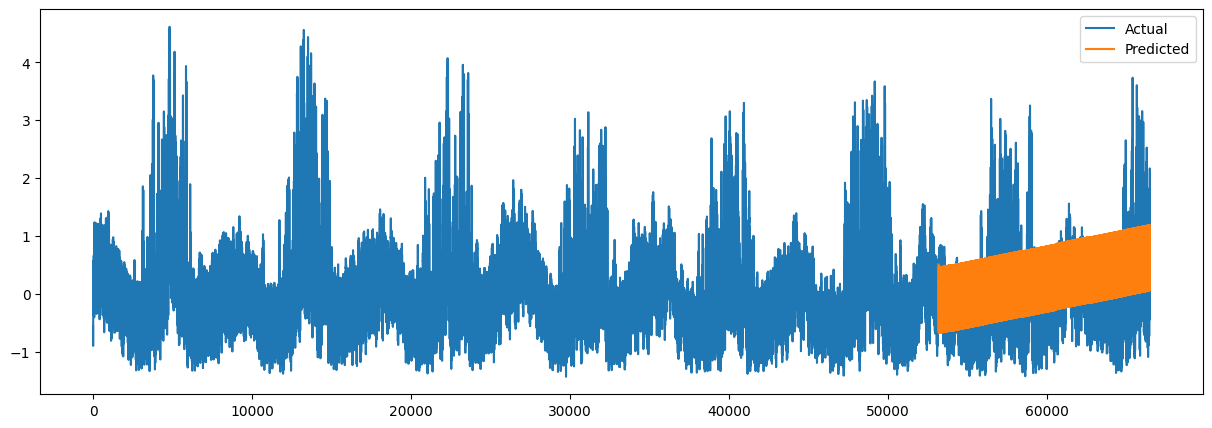

In [12]:
#plot the predictions as a continued line starting from the train data
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(df['COMED_MW_scaled'], label='Actual')
plt.plot([None for i in train['COMED_MW_scaled']] + [x for x in predictions], label='Predicted')
plt.legend()
plt.show()

In [13]:
# Save a csv file with the results. The csv file should contain the folllwing columns: ,Datetime,COMED_MW_scaled,Season_encoded,Time_of_day_encoded,Holiday_encoded,Predictions. The predictions should start from the first row of the test data and continue to the end of the test data. The total number of rows should be equal to the length of the total data:
results = pd.DataFrame()
results['Datetime'] = df['Datetime']
results['COMED_MW_scaled'] = df['COMED_MW_scaled']
results['Season_encoded'] = df['Season_encoded']
results['Time_of_day_encoded'] = df['Time_of_day_encoded']
results['Holiday_encoded'] = df['Holiday_encoded']
results['Predictions'] = [None for i in range(len(df))]
results['Predictions'][-len(predictions):] = predictions
results
#results.to_csv('results.csv', index=False)

/tmp/ipykernel_41756/1315318379.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results['Predictions'][-len(predictions):] = predictions
/tmp/ipykernel_41756/1315318379.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Datetime,COMED_MW_scaled,Season_encoded,Time_of_day_encoded,Holiday_encoded,Predictions
0,2011-01-01 01:00:00,-0.557143,3,3,1,None
1,2011-01-01 02:00:00,-0.688278,3,3,1,None
2,2011-01-01 03:00:00,-0.784249,3,3,1,None
3,2011-01-01 04:00:00,-0.883150,3,3,1,None
4,2011-01-01 05:00:00,-0.900366,3,3,1,None
...,...,...,...,...,...,...
66492,2018-08-02 20:00:00,1.935897,2,1,1,1.187663
66493,2018-08-02 21:00:00,1.625641,2,1,1,1.137743
66494,2018-08-02 22:00:00,1.441026,2,3,1,1.063609
66495,2018-08-02 23:00:00,1.207326,2,3,1,0.961346


In [14]:
results.to_csv('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/data/SARIMA_Predictions.csv', index=False)

In [6]:
import pmdarima as pm


smodel = pm.auto_arima(target_data,
                       exogenous=exog_data, 
                       seasonal=True, 
                       m=24,  
                       d=None, D=1, 
                       start_p=0, start_q=0,
                       start_P=0, start_Q=0,
                       max_p=3, max_q=3,
                       max_P=3, max_Q=3,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

print(smodel.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=69618.940, Time=16.24 sec
